In [1]:
from astropy.table import Table
from astropy.io import fits
from vtl.Photo import Photometry
from astropy.cosmology import Planck13, z_at_value
from spec_id import Median_w_Error_cont
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [11]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
qgDB = pd.read_pickle('../data/good_spec_gal_DB.pkl')

goodss_fast = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',
                   format = 'ascii')
goodsn_fast = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',
                   format = 'ascii')

goodss_mag = Table.read('../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat', format = 'ascii')
goodsn_mag = Table.read('../../../Clear_data/goodsn_mosaic/goodsn_3dhstP.cat', format = 'ascii')


# goodss_mag = Table.read('../../../Clear_data/goodss_3dhst.v4.3.cat', format = 'ascii')
# goodsn_mag = Table.read('../../../Clear_data/goodsn_3dhst.v4.3.cat', format = 'ascii')

# goodss = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
#                    format = 'ascii')
# goodsn = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
#                    format = 'ascii')

In [33]:
phot_db = pd.read_pickle('../data/phot_db.pkl')
Clam = 10**((-1.1)/2.5-29)

In [28]:
phot_db

,eff_wv,fwhm,n14713,n14713_err,n16758,n16758_err,n17070,n17070_err,n19442,n19442_err,...,s45972,s45972_err,s46066,s46066_err,s46345,s46345_err,s47677,s47677_err,s48631,s48631_err
s_F606Wcand,5818.000000,1550.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
s_F606W,5818.000000,1550.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,1.842122,0.042595,0.508798,0.028743,-99.000000,-99.000000,-99.000000,-99.000000,1.360973,0.075360
s_R,6418.000000,943.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,2.896026,0.027874,0.691281,0.026387,0.250015,0.018163,0.820523,0.024696,2.152800,0.051871
s_Rc,6460.000000,1103.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,2.990469,0.069154,0.773933,0.051897,0.193690,0.042023,0.816439,0.053637,2.075598,0.096157
s_F775W,7634.000000,990.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,6.765190,0.072645,2.371791,0.048622,-99.000000,-99.000000,-99.000000,-99.000000,4.521061,0.129567
s_I,8549.000000,1356.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,13.561190,0.423599,4.134985,0.293417,1.334638,0.257392,3.297968,0.296045,9.430043,0.467359
s_F814Wcand,8001.000000,1585.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,8.995494,0.064019,3.079942,0.038375,0.782762,0.071825,-99.000000,-99.000000,6.211490,0.124296
s_F850LP,9001.000000,1235.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,15.831162,0.095238,5.559113,0.067928,-99.000000,-99.000000,-99.000000,-99.000000,10.484480,0.168063
s_F850LPcand,9001.000000,1235.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,15.894367,0.313434,5.517749,0.138862,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
s_F098M,9841.000000,1163.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,22.564123,0.086817,9.745344,0.054790,-99.000000,-99.000000,-99.000000,-99.000000,15.307628,0.135199


In [5]:
filters_ID =[18, 19, 20, 21]
filter_fl = ['f_IRAC1', 'f_IRAC2', 'f_IRAC3', 'f_IRAC4']
filter_er = ['e_IRAC1', 'e_IRAC2', 'e_IRAC3', 'e_IRAC4']
wv,fl = np.load('../../../fsps_models_for_fit/fsps_spec/m0.019_a3.0_dt8.0_spec.npy')

In [7]:
phot = Photometry(wv,fl,fl,18)

eff_wv = np.zeros(4)
fwhm = np.zeros(4)

for i in range(len(filters_ID)):
    phot.Get_Sensitivity(filters_ID[i])
    phot.Photo()
    phot.Photo_model(wv,fl)
    phot.FWHM()

    eff_wv[i] = phot.eff_mwv
    fwhm[i] = phot.fwhm

In [8]:
print eff_wv

[ 35439.79810911  44839.15069197  57164.2277127   78285.06760846]


In [12]:
irac1, irac2, irac3, irac4 = [[],[],[],[]]
irac1_er, irac2_er, irac3_er, irac4_er = [[],[],[],[]]

A_v = []
for i in galDB.index:
    if galDB['gids'][i][0] == 's':
        irac1.append(goodss_mag['f_IRAC1'][galDB['ids'][i]-1])
        irac2.append(goodss_mag['f_IRAC2'][galDB['ids'][i]-1])
        irac3.append(goodss_mag['f_IRAC3'][galDB['ids'][i]-1])
        irac4.append(goodss_mag['f_IRAC4'][galDB['ids'][i]-1])
        irac1_er.append(goodss_mag['e_IRAC1'][galDB['ids'][i]-1])
        irac2_er.append(goodss_mag['e_IRAC2'][galDB['ids'][i]-1])
        irac3_er.append(goodss_mag['e_IRAC3'][galDB['ids'][i]-1])
        irac4_er.append(goodss_mag['e_IRAC4'][galDB['ids'][i]-1])
        A_v.append(goodss_fast['Av'][galDB['ids'][i]-1])
        
    if galDB['gids'][i][0] == 'n':
        irac1.append(goodsn_mag['f_IRAC1'][galDB['ids'][i]-1])
        irac2.append(goodsn_mag['f_IRAC2'][galDB['ids'][i]-1])
        irac3.append(goodsn_mag['f_IRAC3'][galDB['ids'][i]-1])
        irac4.append(goodsn_mag['f_IRAC4'][galDB['ids'][i]-1])
        irac1_er.append(goodsn_mag['e_IRAC1'][galDB['ids'][i]-1])
        irac2_er.append(goodsn_mag['e_IRAC2'][galDB['ids'][i]-1])
        irac3_er.append(goodsn_mag['e_IRAC3'][galDB['ids'][i]-1])
        irac4_er.append(goodsn_mag['e_IRAC4'][galDB['ids'][i]-1])
        A_v.append(goodsn_fast['Av'][galDB['ids'][i]-1])


In [14]:
print len(irac1)

35


In [17]:
IRone = [eff_wv[0],fwhm[0]]
IRtwo = [eff_wv[1],fwhm[1]]
IRthree = [eff_wv[2],fwhm[2]]
IRfour = [eff_wv[3],fwhm[3]]

for i in range(len(irac1)):
    IRone.append(irac1[i])
    IRone.append(irac1_er[i])
    
    IRtwo.append(irac2[i])
    IRtwo.append(irac2_er[i])
    
    IRthree.append(irac3[i])
    IRthree.append(irac3_er[i])
    
    IRfour.append(irac4[i])
    IRfour.append(irac4_er[i])

In [23]:
new_phot = pd.DataFrame([IRone,IRtwo,IRthree,IRfour],index=['IRAC_3.6','IRAC_4.5','IRAC_5.8','IRAC_8.0'],
                       columns = list(phot_db.columns))

In [25]:
new_phot = phot_db.append(new_phot)

In [26]:
# pd.to_pickle(new_phot,'../data/phot_db.pkl')

# photo plots

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


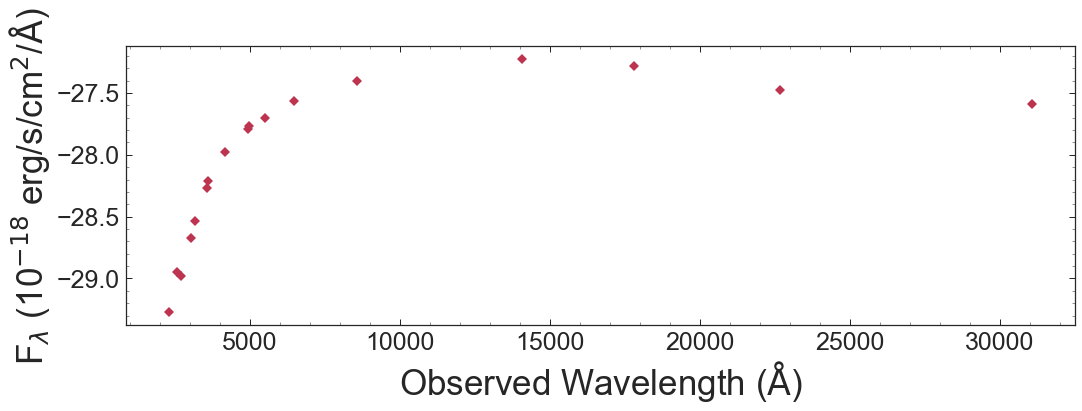

In [55]:
%matplotlib inline    

plt.figure(figsize=[17,6])
# plt.errorbar(spec.gal_wv,spec.gal_fl * 1E18,spec.gal_er * 1E18,fmt='o',
# color = '#377eb8', ms=2,elinewidth=1,label = 'GND21156, z=1.251')


# plt.errorbar(phot_db['eff_wv'],np.log10(phot_db['n21156'] * Clam) ,np.log10(phot_db['n21156_err'] * Clam),
#              phot_db['fwhm']/2 ,color='#BC344F',fmt='D',label='Broad-Band Photometry')

plt.plot(phot_db['eff_wv']/2.52,np.log10(phot_db['n21156'] * Clam),'D',
         color='#BC344F',label='Broad-Band Photometry')
# plt.ylim(0,-27)
# plt.xlim(7500,11350)
plt.minorticks_on()
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('Observed Wavelength ($ \\rm \AA$)',size=35)
# plt.legend(loc=4,fontsize = 25)
plt.gcf().subplots_adjust(bottom=0.235)